## Sleep Health and Lifestyle

### Introduction
A sleep disorder is a medical condition that affects an individual's ability to have a healthy and restorative night's sleep. Sleep is an essential part of our daily routine, and disturbances in this natural process can have profound impacts on physical, mental, and emotional well-being. There are various types of sleep disorders, each characterized by distinct symptoms and underlying causes.

Common sleep disorders include insomnia, sleep apnea, narcolepsy,and parasomnias like sleepwalking or night terrors. These conditions can result in difficulty falling asleep, staying asleep, or experiencing refreshing sleep. As a result, individuals with sleep disorders often experience daytime fatigue, mood disturbances, and cognitive impairments.

Sleep disorders can be caused by a wide range of factors, including lifestyle, stress, underlying medical conditions, and genetic predispositions. They are diagnosed through clinical evaluations, sleep studies, and assessments of sleep patterns and behaviors. Treatment options vary depending on the specific disorder and may include lifestyle modifications, medications, or therapies aimed at improving sleep quality.

Understanding and addressing sleep disorders are crucial for overall health and quality of life, as untreated conditions can lead to severe health consequences. Machine learning and artificial intelligence(AI) algorithms are also used to predict which patterns are at the hishest risk of sleep disorder and enable healthcare providers to intervene proactively to prevent sleep disorder.

### Data and Methods
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

Person ID
Gender
Age
Occupation
Sleep Duration: Average number of hours of sleep per day
Quality of Sleep: A subjective rating on a 1-10 scale
Physical Activity Level: Average number of minutes the person engages in physical activity daily
Stress Level: A subjective rating on a 1-10 scale
BMI Category
Blood Pressure: Indicated as systolic pressure over diastolic pressure
Heart Rate: In beats per minute
Daily Steps
Sleep Disorder: One of None, Insomnia or Sleep Apnea
Remarks on the data: The dataframe contains 374 rows and 13 columns, with no missing values or duplicate rows.Most of the numeric columns exhibit skewness,likely due to a significant number of outlier which totalled 15 .To prevent the loss of important information during analysis we retained these outliers.

Methods The exploratory data analysis involved various methodologies, including data cleaning, data visualization, statistical analysis, and machine learning algorithms. To clean the data, I used pandas to handle missing values and ouliers, and transform variables as necessary.I also used pd.getdummies, to prepare the data for machine learning algorithms.For visualization, I employed Matplotlib and seaborn to create various plots,including barplots, lineplots, scatterplots and heatmaps, to identify patterns and understand relationship between variables. For machine learning, I implemented varoius algorithms, such as K-Nearest Neighbors, Logistic Regression, DecisionTreeClassifiers, Linear Support Vector Machine, Multilayer perception and evaluated the model based on accuracy ,F1 score ,recall and precision.

### Target variable

**A. Sleep Apnea:**
Sleep apnea is a sleep disorder characterized by pauses in breathing or instances of shallow or infrequent breathing during sleep. These interruptions in breathing can last for a few seconds to minutes and may occur multiple times per hour. There are three main types of sleep apnea:

1. **Obstructive Sleep Apnea (OSA):**
   - The most common form, OSA occurs when the muscles in the throat relax excessively during sleep, causing a blockage in the airway.

2. **Central Sleep Apnea (CSA):**
   - CSA is less common and involves a failure of the brain to transmit the appropriate signals to the muscles that control breathing.

3. **Complex Sleep Apnea Syndrome (Treatment-Emergent Central Sleep Apnea):**
   - Also known as treatment-emergent central sleep apnea, this type occurs when someone with OSA develops CSA after starting continuous positive airway pressure (CPAP) therapy.

**Common Symptoms of Sleep Apnea:**
- Loud snoring.
- Episodes of breathing cessation followed by a sudden gasp or snort.
- Restless sleep.
- Excessive daytime sleepiness.

**Treatment Options:**
- Lifestyle changes (weight loss, positional therapy).
- Continuous positive airway pressure (CPAP) therapy.
- Oral appliances.
- Surgery (in severe cases).

**B. Insomnia:**
Insomnia is a sleep disorder characterized by difficulty falling asleep, staying asleep, or both, despite having the opportunity for adequate sleep. It can be a chronic condition or a transient issue caused by stress, changes in environment, or other factors.

**Common Types of Insomnia:**
1. **Transient Insomnia:**
   - Lasts for a few nights and is often linked to a specific event or circumstance.

2. **Acute Insomnia:**
   - Brief episodes of difficulty sleeping, typically lasting for less than a month.

3. **Chronic Insomnia:**
   - Ongoing difficulty sleeping that occurs at least three nights per week for three months or longer.

**Common Causes of Insomnia:**
- Stress and anxiety.
- Poor sleep habits.
- Changes in environment or work schedule.

**Common Symptoms of Insomnia:**
- Difficulty falling asleep.
- Waking up during the night and having trouble returning to sleep.
- Feeling tired upon waking.

**C. No Disorder:**
This category represent the group of persons with neither of the above sleep disorder conditions

####  Installing and importing libraries

In [1]:
import pandas as pd 
import mysql.connector as sql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datasist as ds

#### creating sql connection and connecting to database

In [2]:
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='sleepdt')
print(conn)

#### Read in file as dataframe

In [3]:
#read dataset as pandas dataframe
data = pd.read_sql_query('''SELECT * FROM sleepdt.sleep_data''', conn)

sleep_df = pd.DataFrame(data)
sleep_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_21152\2680269667.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM sleepdt.sleep_data''', conn)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


#### DATA CLEANING

In [4]:
#checking for missing values

sleep_df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
#cleaning data columns

sleep_df['Sleep Disorder'] = sleep_df['Sleep Disorder'].replace({'None':'No disorder'})

sleep_df[['Systolic', 'Diastolic']] = sleep_df['Blood Pressure'].str.split('/', expand=True)
sleep_df[['Systolic', 'Diastolic']] = sleep_df[['Systolic', 'Diastolic']].astype('int64','int64')
sleep_df[['Systolic', 'Diastolic']].dtypes

sleep_df['BMI Category']  = sleep_df['BMI Category'].str.replace("Normal Weight", 'Normal')
sleep_df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

#### Exploratory Data Analysis using Datasist Library

In [6]:
#Random five data points

sleep_df.sample(n=5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
169,170,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,No disorder,130,85
158,159,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,No disorder,130,85
150,151,Female,39,Accountant,8.0,9,80,3,Normal,115/78,67,7500,No disorder,115,78
202,203,Male,43,Engineer,7.8,8,90,5,Normal,130/85,70,8000,Insomnia,130,85
88,89,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,No disorder,125,80


In [7]:
#Shape of  data 
print("shape of data :", sleep_df.shape)

#Size of  data set
print("size of dataset :", sleep_df.size)

shape of data : (374, 15)
size of dataset : 5610


In [8]:
#Data Types
sleep_df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int64
Diastolic                    int64
dtype: object

In [9]:
#Statistical Description of categorical Columns
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


In [10]:
#statistical description of numerical columns
sleep_df.describe(exclude=[np.number])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,3,25,3
top,Male,Nurse,Normal,130/85,No disorder
freq,189,73,216,99,219


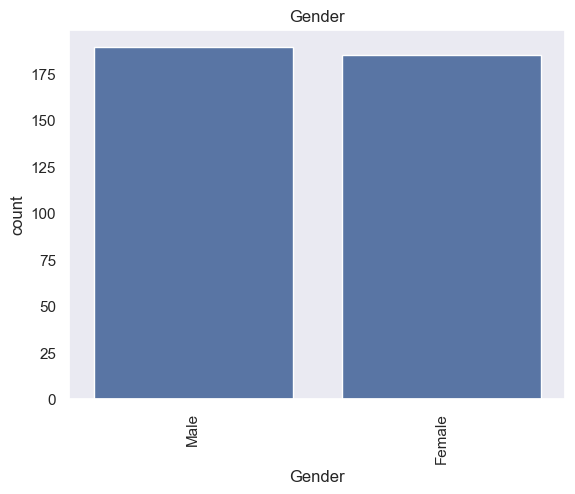

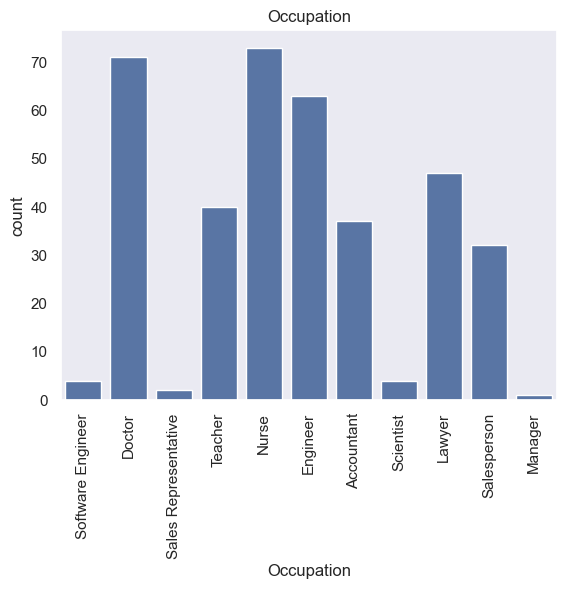

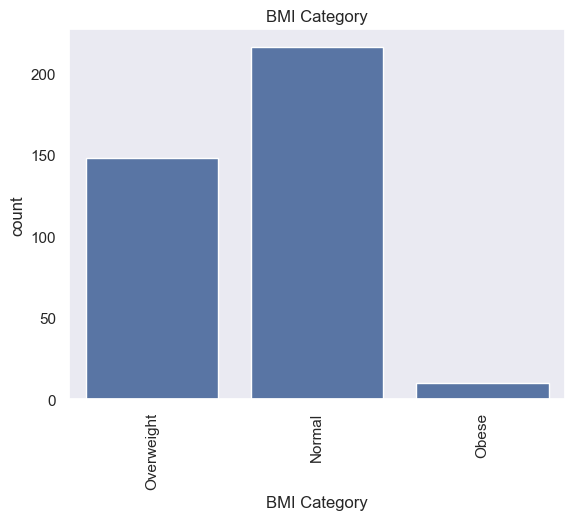

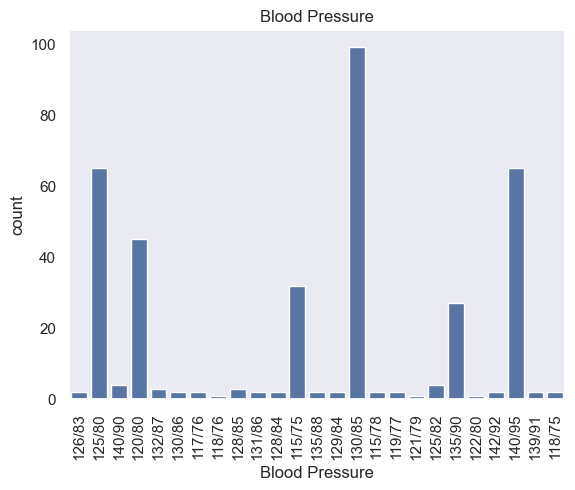

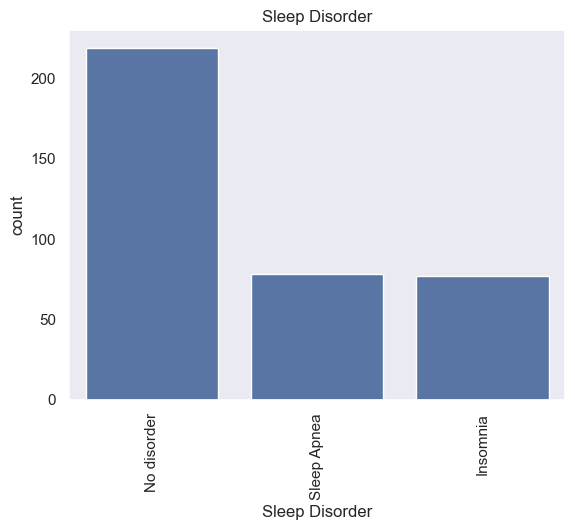

In [11]:
#data visualization
columns = ['Gender','Occupation','BMI Category',
           'Blood Pressure','Sleep Disorder']

sns.set(style='dark',font_scale=1)
#sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=sleep_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

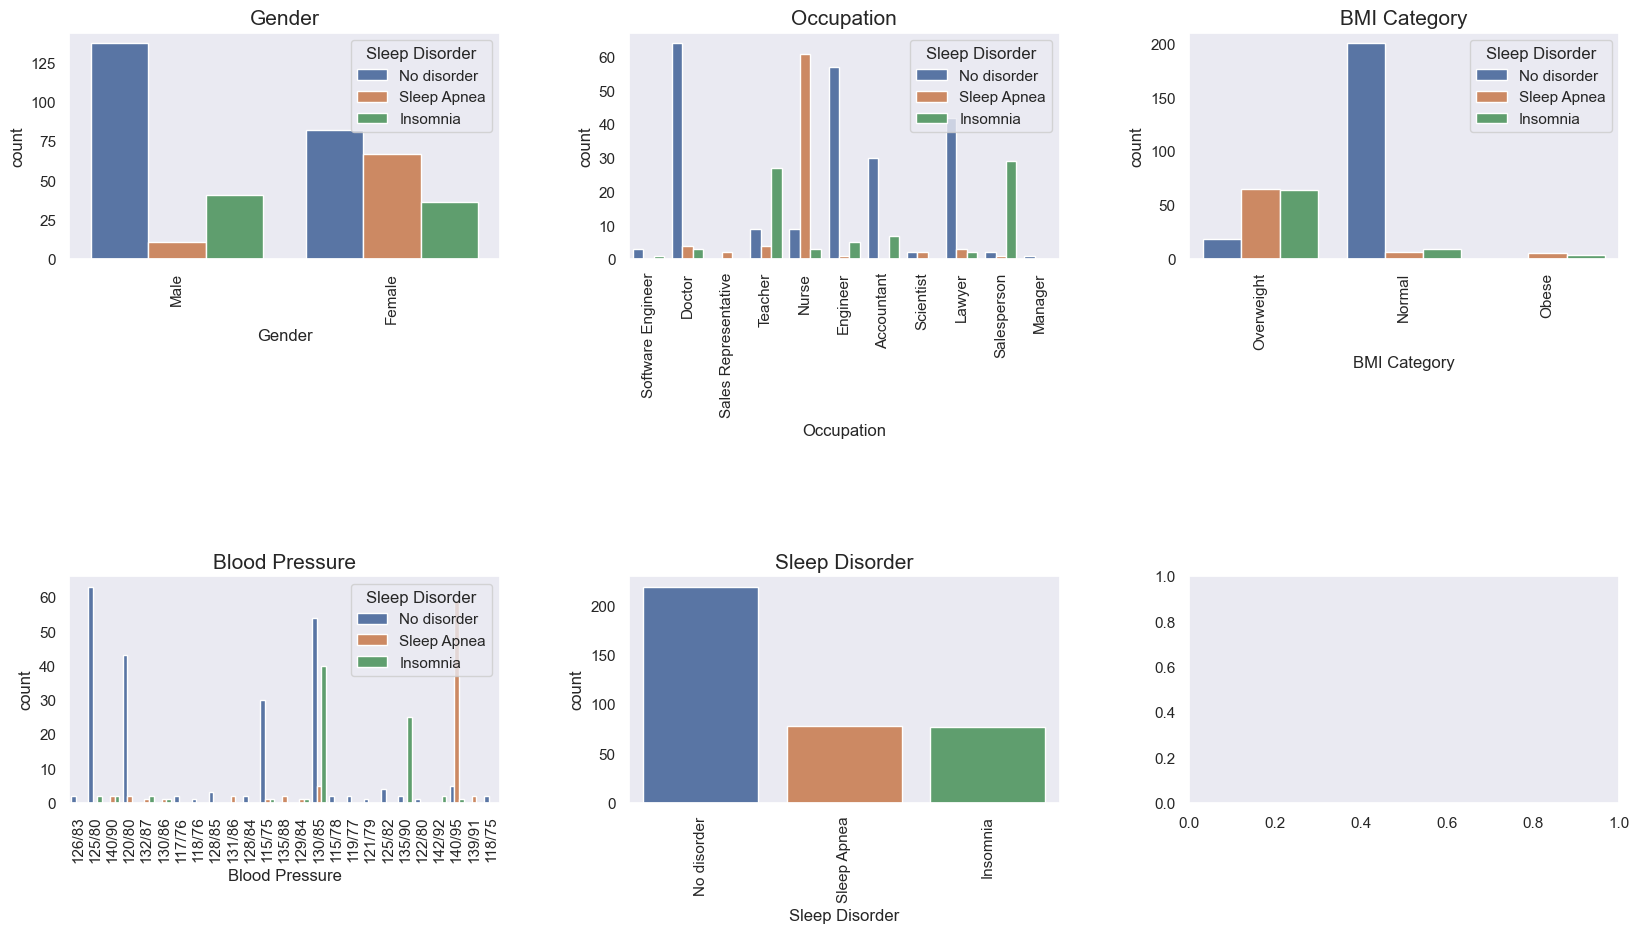

In [12]:
#visualize the information above for easy understanding
#value counting the categorical columns

cols = ['Gender','Occupation','BMI Category',
           'Blood Pressure','Sleep Disorder']

# plot data distribution
fig, axs = plt.subplots(2,3, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate(cols):
    sns.countplot(x=var, ax=axs[i], data=sleep_df, hue='Sleep Disorder')
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=1.4, wspace=0.3)
plt.show()

#### Feature Engineering

Feature Engineering is the process of using domain knowledge to select and transform feature from raw data before building a predictive model using machine learning.

In [13]:
#handling missing values where necessary
sleep_df=ds.feature_engineering.fill_missing_cats(sleep_df)
sleep_df=ds.feature_engineering.fill_missing_num(sleep_df)

In [14]:
#drop none relevant column
sleep_df = sleep_df.drop(['Person ID','Blood Pressure'], axis=1)
sleep_df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No disorder,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No disorder,125,80


In [15]:
#print all column name 
sleep_df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic'],
      dtype='object')

In [16]:
#checking for the variance of numeric data only
data = sleep_df.select_dtypes(exclude=['category','object'])
data.var()

Age                        7.522324e+01
Sleep Duration             6.330696e-01
Quality of Sleep           1.432703e+00
Physical Activity Level    4.339224e+02
Stress Level               3.148944e+00
Heart Rate                 1.710381e+01
Daily Steps                2.617651e+06
Systolic                   6.003333e+01
Diastolic                  3.796546e+01
dtype: float64

In [17]:
#using standard scaler for preprocessing of the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


#creating the scaled dataframe as scaled_df
Columns = data.columns
scaled_df = pd.DataFrame(data=scaled_data, columns=Columns)
scaled_df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486
...,...,...,...,...,...,...,...,...,...
369,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049
370,1.941401,1.092276,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049
371,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049
372,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049


In [18]:
#checking variance after scaling
scaled_df.var()

Age                        1.002681
Sleep Duration             1.002681
Quality of Sleep           1.002681
Physical Activity Level    1.002681
Stress Level               1.002681
Heart Rate                 1.002681
Daily Steps                1.002681
Systolic                   1.002681
Diastolic                  1.002681
dtype: float64

In [19]:
#converting categorical columns to int data type
cat_data = sleep_df.select_dtypes(exclude=['float','int'])

cat_data.drop(['Sleep Disorder'], axis=1, inplace=True)
cat_dummies = pd.get_dummies(cat_data).astype(int)
cat_dummies

,Gender_Female,Gender_Male,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
370,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
371,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
372,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [20]:
#concating the scaled numerical data and the categorical dummy dataset

new_dt = pd.concat([scaled_df, cat_dummies], axis=1)
new_dt.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Female,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0,...,0,0,0,0,0,1,0,0,0,1
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0,...,0,0,1,0,0,0,0,0,1,0
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0,...,0,0,1,0,0,0,0,0,1,0


In [21]:
#view data types of columns
new_dt.dtypes

Age                                float64
Sleep Duration                     float64
Quality of Sleep                   float64
Physical Activity Level            float64
Stress Level                       float64
Heart Rate                         float64
Daily Steps                        float64
Systolic                           float64
Diastolic                          float64
Gender_Female                        int32
Gender_Male                          int32
Occupation_Accountant                int32
Occupation_Doctor                    int32
Occupation_Engineer                  int32
Occupation_Lawyer                    int32
Occupation_Manager                   int32
Occupation_Nurse                     int32
Occupation_Sales Representative      int32
Occupation_Salesperson               int32
Occupation_Scientist                 int32
Occupation_Software Engineer         int32
Occupation_Teacher                   int32
BMI Category_Normal                  int32
BMI Categor

In [22]:
#converting target variable to int data type

y = pd.get_dummies(sleep_df['Sleep Disorder']).astype('int')
y

,Insomnia,No disorder,Sleep Apnea
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
369,0,0,1
370,0,0,1
371,0,0,1
372,0,0,1


## Modelling

In [23]:
#Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.
from sklearn.model_selection import train_test_split

X = new_dt#.values
y #.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

print(X.shape)
print(y.shape)

(374, 25)
(374, 3)


### LogisticRegression Classifier

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


lr_model = OneVsRestClassifier(LogisticRegression())
lr_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [25]:
lr_model.classes_ , lr_model.multilabel_

(array([0, 1, 2]), True)

In [26]:
train_score = lr_model.score(X_train,y_train)
print(train_score)

lr_score = lr_model.score(X_test,y_test)
print(lr_score)

0.9157088122605364
0.8584070796460177


In [27]:
y_pred = lr_model.predict(X_test)  # For class labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

lr_accuracy = accuracy_score(y_test, y_pred)
print('model_accuracy_score :', lr_accuracy)
lr_precision = precision_score(y_test, y_pred, average='micro')  # 'micro' for multilabel/multiclass problems
print('model_precision_score :', lr_precision)
lr_recall = recall_score(y_test, y_pred, average='micro')
print('model_recall_score :', lr_recall)
lr_f1 = f1_score(y_test, y_pred, average='micro')
print('model_f1_score :', lr_f1)

model_accuracy_score : 0.8584070796460177
model_precision_score : 0.8981481481481481
model_recall_score : 0.8584070796460177
model_f1_score : 0.8778280542986425


In [28]:
#import pandas as pd
#case sample
df = pd.DataFrame()
df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate',
    'Daily Steps', 'Systolic', 'Diastolic', 'Gender_Female',
    'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
    'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
    'Occupation_Sales Representative', 'Occupation_Salesperson', 'Occupation_Scientist', 'Occupation_Software Engineer',
    'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese','BMI Category_Overweight'
    ]] = [[45, 5.2, 8, 90, 5, 77, 4200, 120, 70, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

lr_model.predict(df)

array([[0, 1, 1]])

In [30]:
lr_model.predict_proba(df)

array([[0., 1., 1.]])

## create a pickle file

In [29]:
import pickle
file = open('logistic_model.pkl','wb')
pickle.dump(lr_model, file)
file.close()